In [1]:
# importing necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [2]:
# read a cracked sample image
img = cv2.imread('Input-Set/Cracked_04.jpg')
def load_images(folder_path):
    images = os.listdir(folder_path)
    img_list = []
    for image in images:
        img_path = os.path.join(folder_path, image)
        img = cv2.imread(img_path)
        img_list.append(img)
    
    return img_list

In [3]:
def display_images(image_list):
    image_dataset = image_list
    fig,ax = plt.subplots(1,3,figsize = (15,15))
    ax = ax.ravel()
    for i in range(3):
        # rand = np.random.randint(0,len(image_dataset))
        image = image_dataset[i]
        ax[i].imshow(image,cmap = 'gray')
    
    plt.show()
        

In [4]:
# List containing all images
image_list = load_images('Input-Set')

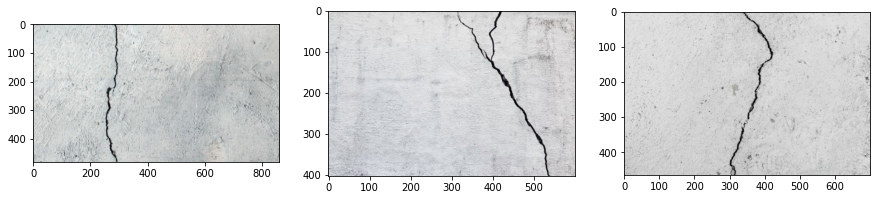

10


In [5]:
# displaying the images
display_images(image_list)
print(len(image_list))

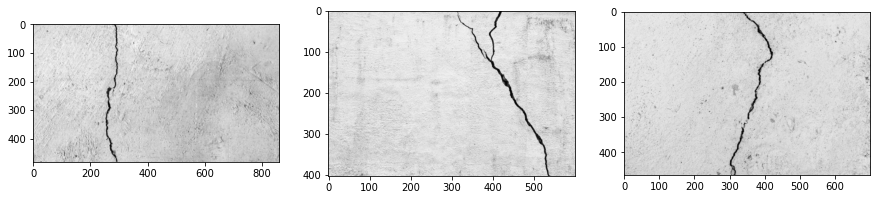

In [6]:
# Convert into gray scale and display them
gray_img_lst = []
for img in image_list:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img_lst.append(gray)

display_images(gray_img_lst)

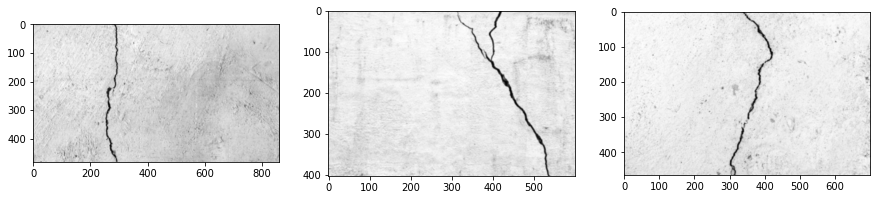

In [7]:
# Image processing ( smoothing )
# Averaging
blur_img_lst = []
for img in gray_img_lst:
    blur = cv2.blur(img,(3,3))
    blur_img_lst.append(blur)

display_images(blur_img_lst)

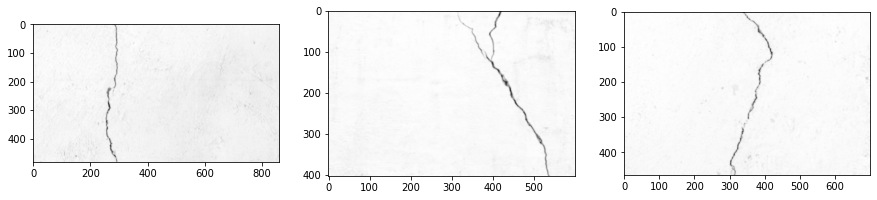

In [8]:
# Apply logarithmic transform
log_img_lst = []
for img in blur_img_lst:
    img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
    
    # Specify the data type
    img_log = np.array(img_log,dtype=np.uint8)
    log_img_lst.append(img_log)

display_images(log_img_lst)

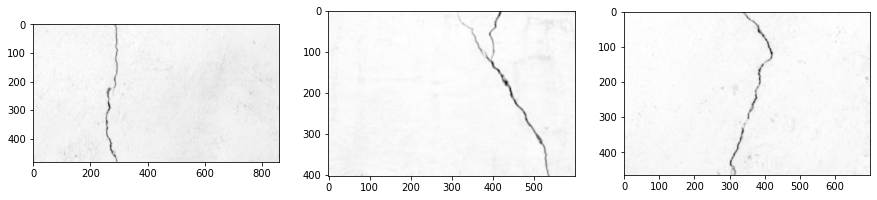

In [9]:
# Image smoothing: bilateral filter
bilateral_img_lst = []
for img in log_img_lst:
    bilateral = cv2.bilateralFilter(img, 5, 75, 75)
    bilateral_img_lst.append(bilateral)

display_images(bilateral_img_lst)

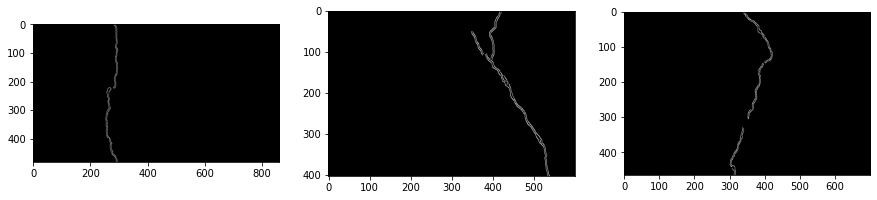

In [10]:
# Canny Edge Detection
canny_img_lst = []
for img in bilateral_img_lst:
    edges = cv2.Canny(img,100,200)
    canny_img_lst.append(edges)

display_images(canny_img_lst)

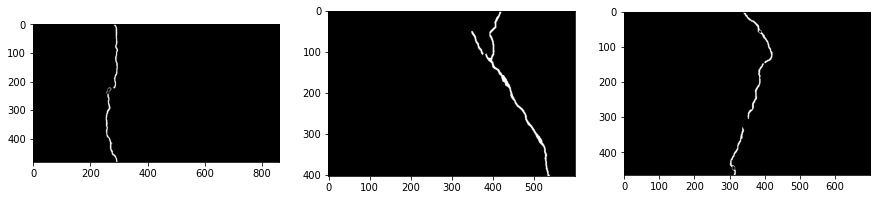

In [11]:
# Morphological Closing Operator
morph_img_lst = []
for img in canny_img_lst:
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    morph_img_lst.append(closing)

display_images(morph_img_lst)

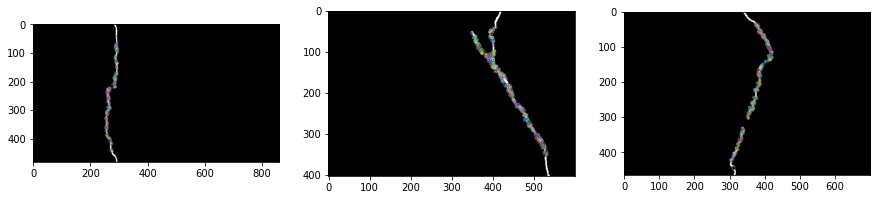

In [12]:
# Morphological Closing Operator
feature_img_lst = []
for img in morph_img_lst:
    # Create feature detecting method
    # sift = cv2.xfeatures2d.SIFT_create()
    # surf = cv2.xfeatures2d.SURF_create()
    orb = cv2.ORB_create(nfeatures=1500)

    # Make featured Image
    keypoints, descriptors = orb.detectAndCompute(img, None)
    featuredImg = cv2.drawKeypoints(img, keypoints, None)

    feature_img_lst.append(featuredImg)

display_images(feature_img_lst)

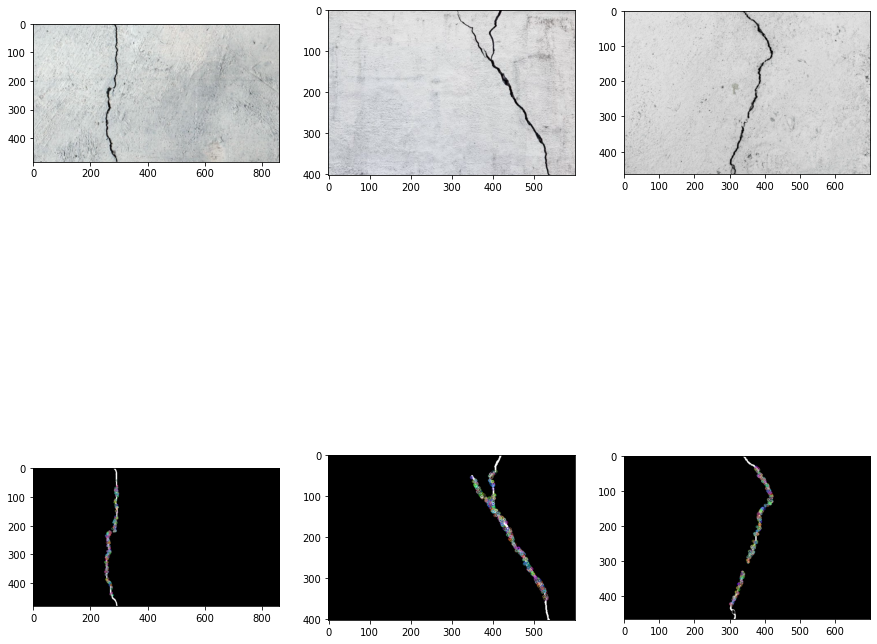

In [13]:
fig,ax = plt.subplots(2,3,figsize = (15,15))
ax = ax.ravel()
for i in range(6):
    # rand = np.random.randint(0,len(image_dataset))
    if i <3:
        image = image_list[i]
        ax[i].imshow(image,cmap = 'gray')
    else:
        num = i-3
        image = feature_img_lst[num]
        ax[i].imshow(image,cmap = 'gray')

In [14]:
def save_image():
    for i in range(3):
        cv2.imwrite(f'Output_Set/CrackDetected_{i}.png', feature_img_lst[i])


In [15]:
save_image()